##A3: Unsupervised learning with AHC

Dataset: winequality-red.txt || https://archive.ics.uci.edu/dataset/186/wine+quality



AHC: Hierarchical Clustering  Algorithm(AHC): Clustering is a specific discipline within Machine Learning with the goal of dividing your data into homogeneous groups with common characteristics. This is a highly valued field, especially in marketing, where the aim is often to segment customer databases to identify specific behaviors.

# Import modules

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Loading dataset

In [4]:
# Load training data
filename = '/content/winequality_red.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
target = ["quality"]

# Separating out the features
X = df.loc[:, features].values

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  


# Plot dendogram function

In [5]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering technique used in machine learning and data analysis. The primary goal of agglomerative clustering is to build a hierarchy of clusters, often represented as a tree-like structure known as a dendrogram. This method starts with each data point as an individual cluster and then merges the closest pairs of clusters until only one cluster remains.

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

'average' uses the average of the distances of each observation from the two sets.
We set distance_threshold=0 to ensure that we compute the entire tree.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


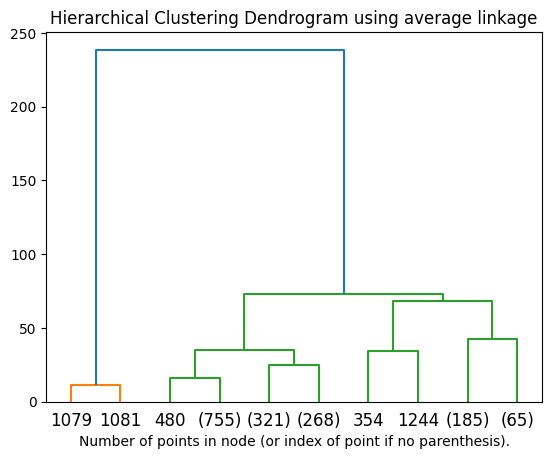

In [6]:
model = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using average linkage")

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

'complete' uses the maximum distances between all observations in the two sets.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


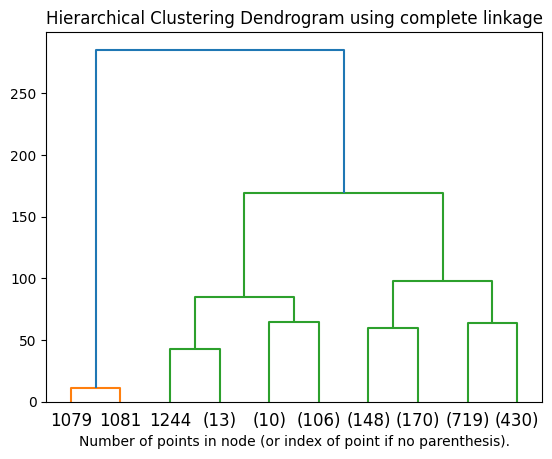

In [7]:
model = AgglomerativeClustering(affinity='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram using complete linkage")

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()